# Value-based prediction

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

from lqsvg.experiment import plot
from lqsvg.experiment.utils import wandb_runs_dataframe

sns.set()

/Users/angelolovatto/Library/Caches/pypoetry/virtualenvs/lqsvg-G_e_Olvw-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [2]:
DATA = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={},
    tags=["ValueLearning", "9.30.0"],
)
DATA.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/test/relative_vval_err,summary/test/grad_acc,summary/controllability,summary/val/action_grad_acc,summary/test/bootstrap/relative_qval_err,test/grad_acc,test/bootstrap/action_grad_acc,test/action_grad_acc,test/bootstrap/relative_qval_err,test/relative_vval_err
0,0,0.482922,6.206344,0,0.607343,5,0,0.577971,35.23204,1633021724,...,5.042147,0.653986,True,0.828548,0.913338,NaN,NaN,NaN,NaN,NaN
1,99,NaN,NaN,2,NaN,9,0,NaN,NaN,1633021728,...,5.042147,0.653986,True,0.828548,0.913338,NaN,NaN,NaN,NaN,NaN
2,149,NaN,NaN,3,NaN,12,0,NaN,NaN,1633021731,...,5.042147,0.653986,True,0.828548,0.913338,NaN,NaN,NaN,NaN,NaN
3,199,NaN,NaN,4,NaN,14,0,NaN,NaN,1633021733,...,5.042147,0.653986,True,0.828548,0.913338,NaN,NaN,NaN,NaN,NaN
4,249,NaN,NaN,5,NaN,17,0,NaN,NaN,1633021736,...,5.042147,0.653986,True,0.828548,0.913338,NaN,NaN,NaN,NaN,NaN


In [3]:
DATA.columns

Index(['trainer/global_step', 'val/grad_acc',
       'val/bootstrap/relative_qval_err', '_step', 'val/action_grad_acc',
       '_runtime', 'epoch', 'val/bootstrap/action_grad_acc',
       'val/relative_vval_err', '_timestamp', 'train/action_grad_acc',
       'train/bootstrap/relative_qval_err', 'train/loss',
       'train/relative_vval_err', 'train/grad_acc',
       'train/bootstrap/action_grad_acc', 'config/loss', 'config/seed',
       'config/polyak', 'config/weight_decay', 'config/learning_rate',
       'config/model/type', 'config/model/hunits', 'config/trainer/max_epochs',
       'config/trainer/weights_summary', 'config/trainer/val_check_interval',
       'config/trainer/progress_bar_refresh_rate',
       'config/datamodule/trajectories', 'config/datamodule/val_batch_size',
       'config/datamodule/train_batch_size', 'config/env_config/n_ctrl',
       'config/env_config/horizon', 'config/env_config/n_state',
       'config/env_config/passive_eigval_range', 'config/exploration/ty

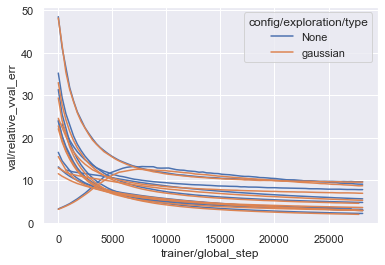

In [4]:
sns.lineplot(
    data=DATA[DATA["config/polyak"] != 0],
    x="trainer/global_step",
    y="val/relative_vval_err",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

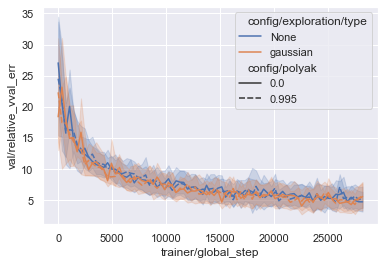

In [5]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/relative_vval_err",
    hue="config/exploration/type",
    style="config/polyak",
)
plt.show()

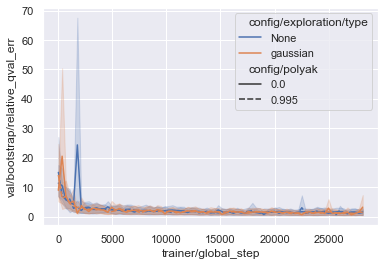

In [6]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/bootstrap/relative_qval_err",
    hue="config/exploration/type",
    style="config/polyak",

)
plt.show()

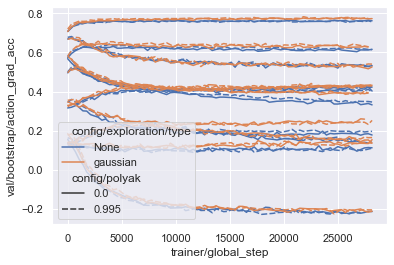

In [7]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/bootstrap/action_grad_acc",
    hue="config/exploration/type",
    style="config/polyak",
    units="config/seed",
    estimator=None
)
plt.show()

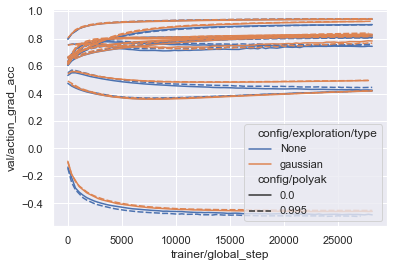

In [8]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/action_grad_acc",
    hue="config/exploration/type",
    style="config/polyak",
    units="config/seed",
    estimator=None
)
plt.show()

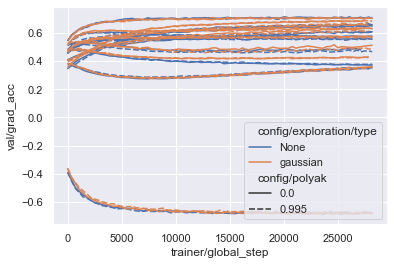

In [9]:
sns.lineplot(
    data=DATA,
    x="trainer/global_step",
    y="val/grad_acc",
    hue="config/exploration/type",
    style="config/polyak",
    units="config/seed",
    estimator=None
)
plt.show()

## MAGE Prediction

In [10]:
MAGE = wandb_runs_dataframe(
    "angelovtt/ch5",
    configs={"learning_rate": 1e-2},
    tags=["MAGEPrediction", "10.3.0"]
)
MAGE.head()

,trainer/global_step,val/grad_acc,val/bootstrap/relative_qval_err,_step,val/action_grad_acc,_runtime,epoch,val/bootstrap/action_grad_acc,val/relative_vval_err,_timestamp,...,summary/test/grad_acc,summary/grad_2.0_norm_policy.k_step,summary/val/relative_vval_err,summary/train/relative_vval_err,summary/train/loss,summary/grad_2.0_norm_qval.q_values.0.linear_step,summary/epoch,summary/grad_2.0_norm_policy.K_epoch,summary/grad_2.0_norm_policy.k_epoch,summary/trainer/global_step
0,0,0.472576,10.67005,0,0.610782,4,0,0.579545,34.919476,1633281386,...,0.732302,5019.95166,2.227387,2.111768,491.980774,3.7376,39,92446.890625,3462.86377,28160
1,49,NaN,NaN,1,NaN,8,0,NaN,NaN,1633281390,...,0.732302,5019.95166,2.227387,2.111768,491.980774,3.7376,39,92446.890625,3462.86377,28160
2,99,NaN,NaN,2,NaN,12,0,NaN,NaN,1633281394,...,0.732302,5019.95166,2.227387,2.111768,491.980774,3.7376,39,92446.890625,3462.86377,28160
3,199,NaN,NaN,4,NaN,20,0,NaN,NaN,1633281402,...,0.732302,5019.95166,2.227387,2.111768,491.980774,3.7376,39,92446.890625,3462.86377,28160
4,249,NaN,NaN,5,NaN,23,0,NaN,NaN,1633281405,...,0.732302,5019.95166,2.227387,2.111768,491.980774,3.7376,39,92446.890625,3462.86377,28160


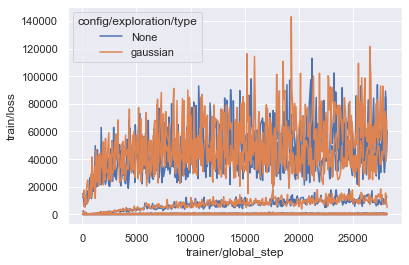

In [11]:
sns.lineplot(
    data=MAGE,
    x="trainer/global_step",
    y="train/loss",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

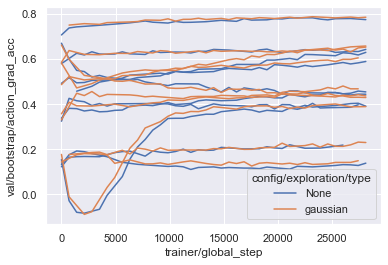

In [12]:
sns.lineplot(
    data=MAGE,
    x="trainer/global_step",
    y="val/bootstrap/action_grad_acc",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

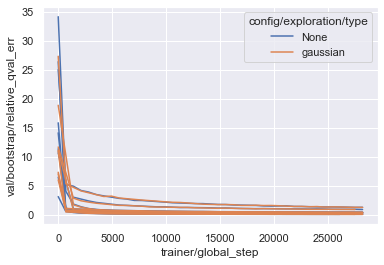

In [13]:
sns.lineplot(
    data=MAGE,
    x="trainer/global_step",
    y="val/bootstrap/relative_qval_err",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

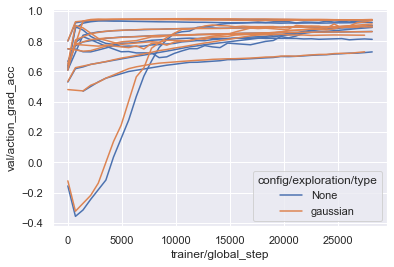

In [14]:
sns.lineplot(
    data=MAGE,
    x="trainer/global_step",
    y="val/action_grad_acc",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

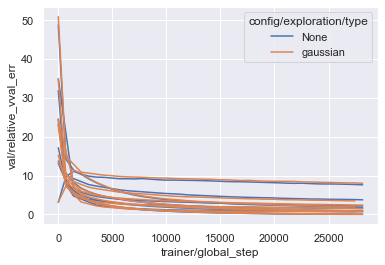

In [15]:
sns.lineplot(
    data=MAGE,
    x="trainer/global_step",
    y="val/relative_vval_err",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

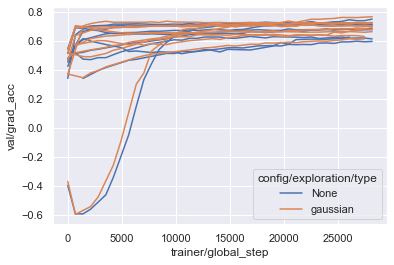

In [16]:
sns.lineplot(
    data=MAGE,
    x="trainer/global_step",
    y="val/grad_acc",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
plt.show()

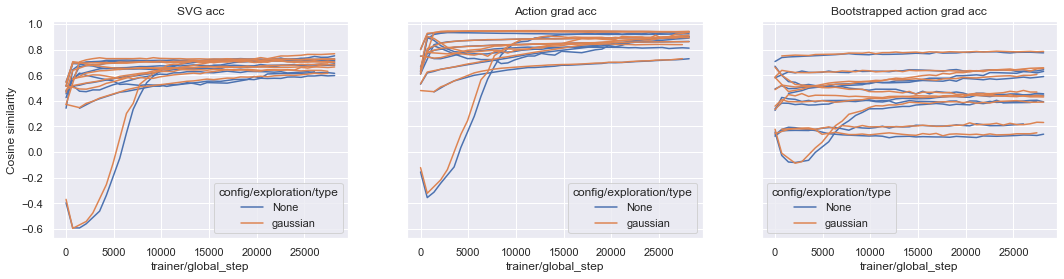

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=plot.default_figsize(1, 3))
sns.lineplot(
    ax=ax0,
    data=MAGE,
    x="trainer/global_step",
    y="val/grad_acc",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
ax0.set_ylabel("Cosine similarity")
ax0.set_title("SVG acc")
sns.lineplot(
    ax=ax1,
    data=MAGE,
    x="trainer/global_step",
    y="val/action_grad_acc",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
ax1.set_title("Action grad acc")
sns.lineplot(
    ax=ax2,
    data=MAGE,
    x="trainer/global_step",
    y="val/bootstrap/action_grad_acc",
    hue="config/exploration/type",
    units="config/seed",
    estimator=None,
)
ax2.set_title("Bootstrapped action grad acc")
plt.show()